In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [12]:
seed=7
np.random.seed(seed)

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
num_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal',activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrix=['accuracy'])
    return model

In [18]:
model = baseline_model()
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,y_test,verbose=0)

/opt/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
0s - loss: 0.2835 - val_loss: 0.1395
Epoch 2/10
0s - loss: 0.1095 - val_loss: 0.0909
Epoch 3/10
0s - loss: 0.0702 - val_loss: 0.0791
Epoch 4/10
0s - loss: 0.0494 - val_loss: 0.0726
Epoch 5/10
0s - loss: 0.0369 - val_loss: 0.0672
Epoch 6/10
0s - loss: 0.0265 - val_loss: 0.0648
Epoch 7/10
0s - loss: 0.0207 - val_loss: 0.0590
Epoch 8/10
0s - loss: 0.0136 - val_loss: 0.0628
Epoch 9/10
0s - loss: 0.0113 - val_loss: 0.0577
Epoch 10/10
0s - loss: 0.0079 - val_loss: 0.0585


In [19]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


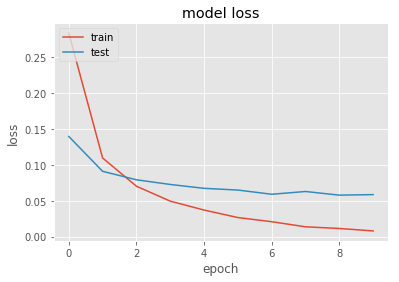

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig('ten-epoch.jpg')
plt.show()

In [22]:
model2 = baseline_model()
history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=200,verbose=2)

/opt/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
0s - loss: 0.2766 - val_loss: 0.1434
Epoch 2/50
0s - loss: 0.1088 - val_loss: 0.0932
Epoch 3/50
0s - loss: 0.0703 - val_loss: 0.0774
Epoch 4/50
0s - loss: 0.0498 - val_loss: 0.0709
Epoch 5/50
0s - loss: 0.0363 - val_loss: 0.0660
Epoch 6/50
0s - loss: 0.0252 - val_loss: 0.0664
Epoch 7/50
0s - loss: 0.0195 - val_loss: 0.0593
Epoch 8/50
0s - loss: 0.0140 - val_loss: 0.0572
Epoch 9/50
0s - loss: 0.0113 - val_loss: 0.0659
Epoch 10/50
0s - loss: 0.0079 - val_loss: 0.0582
Epoch 11/50
0s - loss: 0.0055 - val_loss: 0.0560
Epoch 12/50
0s - loss: 0.0050 - val_loss: 0.0610
Epoch 13/50
0s - loss: 0.0056 - val_loss: 0.0708
Epoch 14/50
0s - loss: 0.0064 - val_loss: 0.0634
Epoch 15/50
0s - loss: 0.0035 - val_loss: 0.0653
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0657
Epoch 17/50
0s - loss: 9.6944e-04 - val_loss: 0.0625
Epoch 18/50
0s - loss: 0.0106 - val_loss: 0.0880
Epoch 19/50
0s - loss: 0.0072 - val_loss: 0.0691
Epoch 20/50
0s - loss: 0

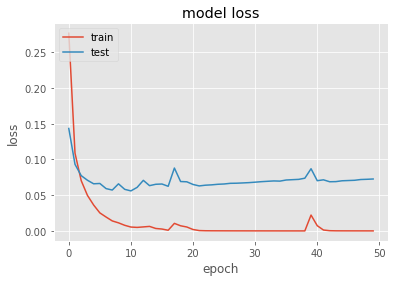

In [23]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig('fifty-epoch.jpg')
plt.show()